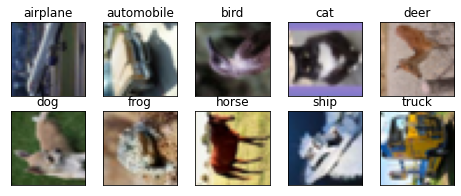

2022-02-26 21:41:40.530441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-26 21:41:40.530818: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Epoch 1/100


2022-02-26 21:41:40.986393: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-26 21:41:41.243323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.6707 - accuracy: 0.3677

2022-02-26 21:41:51.609202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 11s 28ms/step - loss: 1.6707 - accuracy: 0.3677 - val_loss: 1.3419 - val_accuracy: 0.4920
Epoch 2/100
391/391 [==============================] - 11s 27ms/step - loss: 1.1986 - accuracy: 0.5645 - val_loss: 1.1392 - val_accuracy: 0.5939
Epoch 3/100
391/391 [==============================] - 11s 28ms/step - loss: 0.9638 - accuracy: 0.6571 - val_loss: 0.9355 - val_accuracy: 0.6798
Epoch 4/100
391/391 [==============================] - 11s 27ms/step - loss: 0.8102 - accuracy: 0.7130 - val_loss: 0.8386 - val_accuracy: 0.7122
Epoch 5/100
391/391 [==============================] - 11s 28ms/step - loss: 0.6903 - accuracy: 0.7567 - val_loss: 0.8186 - val_accuracy: 0.7265
Epoch 6/100
391/391 [==============================] - 11s 28ms/step - loss: 0.6105 - accuracy: 0.7846 - val_loss: 0.7664 - val_accuracy: 0.7411
Epoch 7/100
391/391 [==============================] - 11s 29ms/step - loss: 0.5330 - accuracy: 0.8125 - val_loss: 0.7676 - val_accuracy: 0.74

391/391 [==============================] - 11s 28ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 2.0493 - val_accuracy: 0.7459
Epoch 58/100
391/391 [==============================] - 11s 29ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 1.9845 - val_accuracy: 0.7364
Epoch 59/100
391/391 [==============================] - 11s 28ms/step - loss: 0.0498 - accuracy: 0.9841 - val_loss: 1.9263 - val_accuracy: 0.7462
Epoch 60/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 2.0936 - val_accuracy: 0.7559
Epoch 61/100
391/391 [==============================] - 11s 29ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 1.8968 - val_accuracy: 0.7417
Epoch 62/100
391/391 [==============================] - 11s 29ms/step - loss: 0.0454 - accuracy: 0.9849 - val_loss: 1.8934 - val_accuracy: 0.7488
Epoch 63/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 1.9972 - val_accuracy

2022-02-26 22:00:11.134577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Accuracy on test data is: 74.35
Time taken= -1110.3610770702362


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 16 08:19:17 2022

@author: navya
"""

import time
import sys
import matplotlib.pyplot as pyplot
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = pyplot.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 0, 2))
    ax.set_title(class_names[i])
    pyplot.imshow(im)
pyplot.show()

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

def plot_model_history(history):
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.savefig('Loss_plot.png')
    pyplot.close()
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    pyplot.savefig("Acuracy_plot.png")
    pyplot.close()

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

model = Sequential()
model.add(Conv2D(48, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(48, (3, 3), activation= 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(Conv2D(96, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(Conv2D(192, (3, 3), activation = 'relu'))
model.add(Conv2D(192, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, epochs=100, validation_data = (test_features, test_labels), 
                       verbose=1)
plot_model_history(model_info)
end = time.time()
# plot model history
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
print("Time taken=", start-end)